# Data Analysis - [`nlp-test-neoway`]

> This document contains the main findings regarding the behavior of the B2W-Reviews01 dataset, which contains features and data descriptive of product
reviews and with potential predictive capabilities.

### Summary
This corpus is a set of product reviews submitted to Americanas.com from January through May, 2018.

B2W-Reviews01 has both the review text and the meta-data related to each review: dates and times, 

ratings, geographical locations and ages of reviewers. 

## Libraries

In [92]:
# Standard libs
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ydata_profiling import ProfileReport
import plotly.express as px
import joypy

sns.set_theme()
sns.set(palette="deep", color_codes=True)

# Utilities

# DataPrep

# Modeling

## Overview of the data

In [61]:
df = pd.read_csv('../data/raw/B2W-Reviews01.csv')
df.head(5)

/tmp/ipykernel_64305/2255767118.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/B2W-Reviews01.csv')


,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [62]:
# Utility functions to get an overview of the data

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (100*df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent (%)'])
    return missing_values[missing_values['Missing_Number']>0]

def oveview(df):
    print("Shape:", df.shape, '\n') 
    print('----------------------------------------')
    print(df.info(), '\n')
    print('----------------------------------------')
    print("Number of Uniques:\n", df.nunique(),'\n')
    print('----------------------------------------')
    print("Missing Values:\n", missing_values(df),'\n')
    print('----------------------------------------')
    print("All Columns:", list(df.columns),'\n')

In [63]:
oveview(df)

Shape: (132373, 14) 

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128

In [64]:
df.describe(include='all')

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
count,132373,132373,132373.0,132289,40982,132367,128360,132071,132373.000000,132355,129098,126389.000000,128237,128382
unique,129927,112993,55930.0,47363,1062,54,713,56555,NaN,2,126724,NaN,2,27
top,2018-04-27 16:20:43,6ca0a1b3fa3b50ffa21e61a01633fd785172ebb04268d1...,128010777.0,Smartphone Motorola Moto G 5S Dual Chip Androi...,samsung,Celulares e Smartphones,Smartphone,Muito bom,NaN,Yes,Entrega super rápida . Parabéns pela agilida...,NaN,M,SP
freq,3,155,428.0,792,6015,20859,17679,3018,NaN,96368,57,NaN,66166,49207
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.492004,NaN,NaN,1977.495898,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.530289,NaN,NaN,21.895265,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,59.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1969.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,1980.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,1987.000000,NaN,NaN


**Insights:**
- ~ 70% null entries for "product_brand"
- Number of different product_id and product_name are different, maybe there is some mistake in this labelling 
- ~ 2,5% didn't write review_text but only 0,22% didn't write review_title
- Most important structured features apparently: *site_category_lv1, overall_rating, recommend_to_a_friend, reviewer_birth_year, reviewer_gender, reviewer_state*
- Only overall_rating and reviewer_birth_year are numerical features

In [65]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Cleaning data:**
- duplicate rows
- product_id needs further investigation regarding the data type and difference in value against product_name
- overall_rating has no null values and recommend_to_a_friend has a minimum number, hence cleaning null rows requires further analysis
- reviewer_birth_year has wrong entries

## Cleaning data for features investigation

**Clean wrong birth_year entry**

In [66]:
df_features = df.copy()
df_features.reviewer_birth_year.describe()

count    126389.000000
mean       1977.495898
std          21.895265
min          59.000000
25%        1969.000000
50%        1980.000000
75%        1987.000000
max        2018.000000
Name: reviewer_birth_year, dtype: float64

In [67]:
df_features = df_features[(df_features['reviewer_birth_year'] > 1900) | pd.isna(df_features['reviewer_birth_year'])] 
print(df_features.reviewer_birth_year.describe()) 

df_features_shape = df_features.shape[0]
print('\n', '----------------------------------------', '\n')
print(f'Number of rows removed: {df.shape[0] - df_features_shape}')

count    126355.000000
mean       1977.675692
std          12.772624
min        1905.000000
25%        1969.000000
50%        1980.000000
75%        1987.000000
max        2018.000000
Name: reviewer_birth_year, dtype: float64

 ---------------------------------------- 

Number of rows removed: 34


**Clean duplicates**

In [68]:
df_features.drop_duplicates(inplace=True)
print(f'Number of rows removed: {df_features_shape - df_features.shape[0]}')

Number of rows removed: 955


## Examination of Features
#### Coverage of problem's scope

Describe whether your datasets contain enough samples in regions of the space that can cover the entire problem scope.

### Representativeness

This is one of the most important steps of your data quality report. It describes whether the domains of your datasets allow for the specifications to be met.

Describe how the Features selected and created answer the problem in hand.

**Sales are concentrated in SP, logarithmically decreasing in other states**

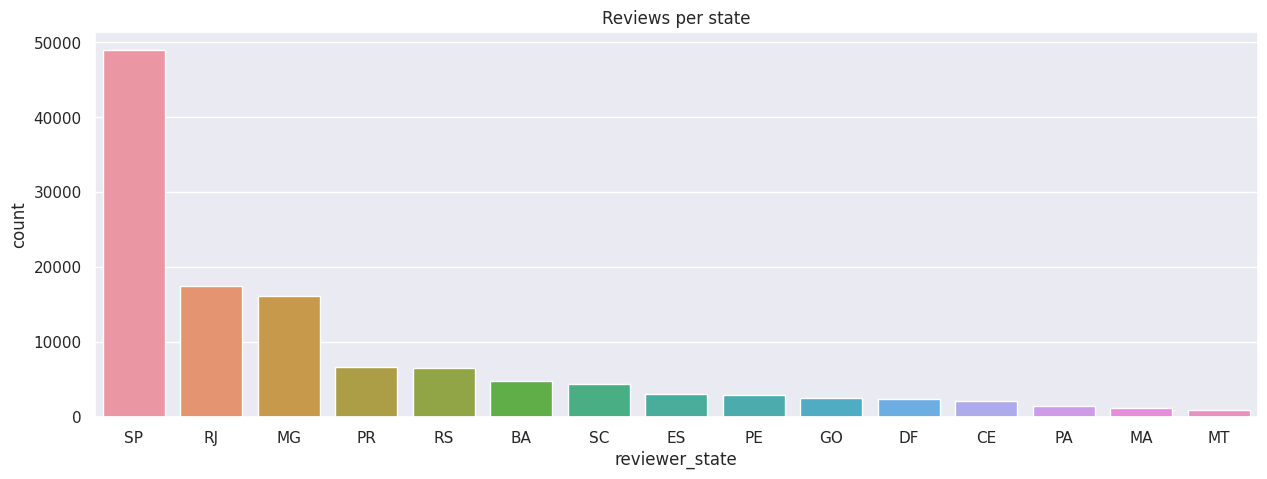

In [71]:
def plot_ranking(df, column, title, rotate=True, number_of_values=15, figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize) 
    # drawing the plot
    sns.countplot(x=column,
                data=df,
                order=df[column].value_counts().iloc[:number_of_values].index, 
                ax=ax).set(title=title)
    if rotate:
        plt.xticks(rotation=45)
    plt.show()

plot_ranking(df_features, 'reviewer_state', 'Reviews per state', rotate=False)

**Sales are concentrated in SP, slowly logarithmically decreasing in other states**

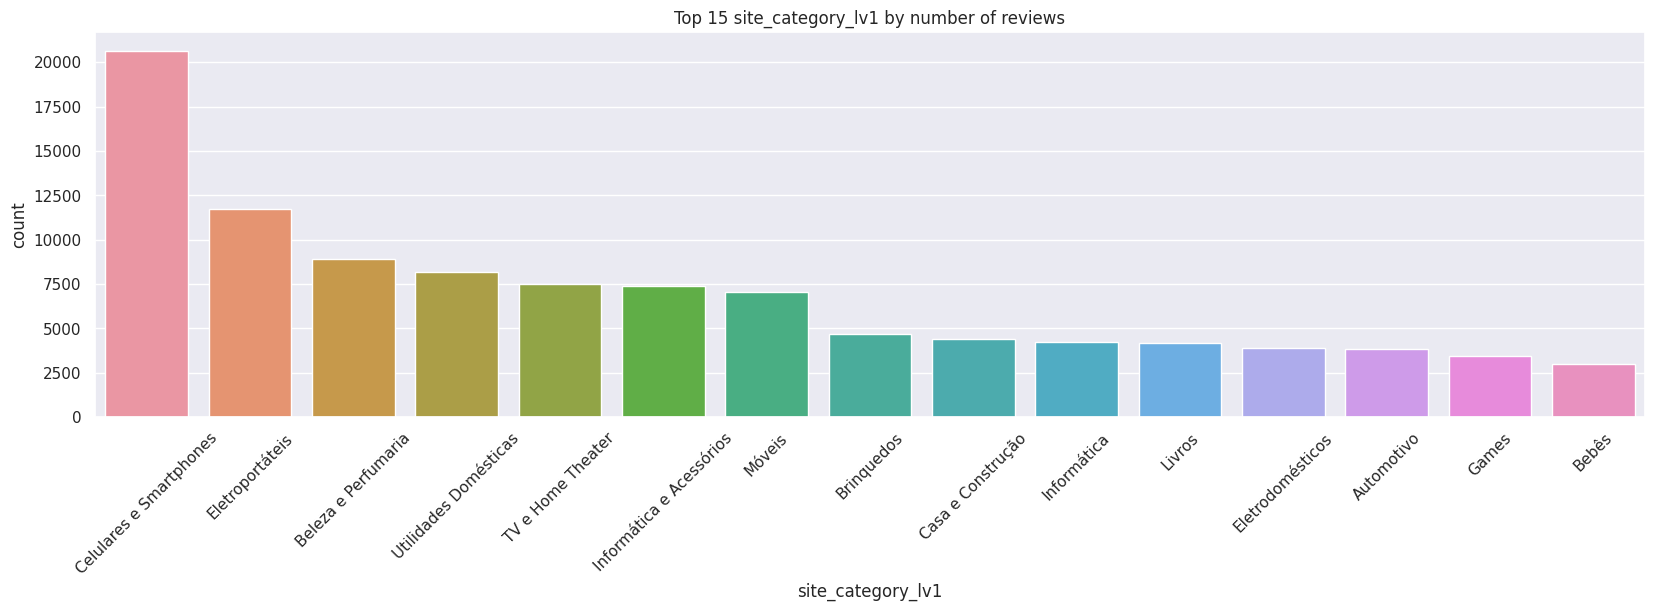

In [48]:
plot_ranking(df_features, 'site_category_lv1', 'Top 15 site_category_lv1 by number of reviews', figsize=(20, 5))

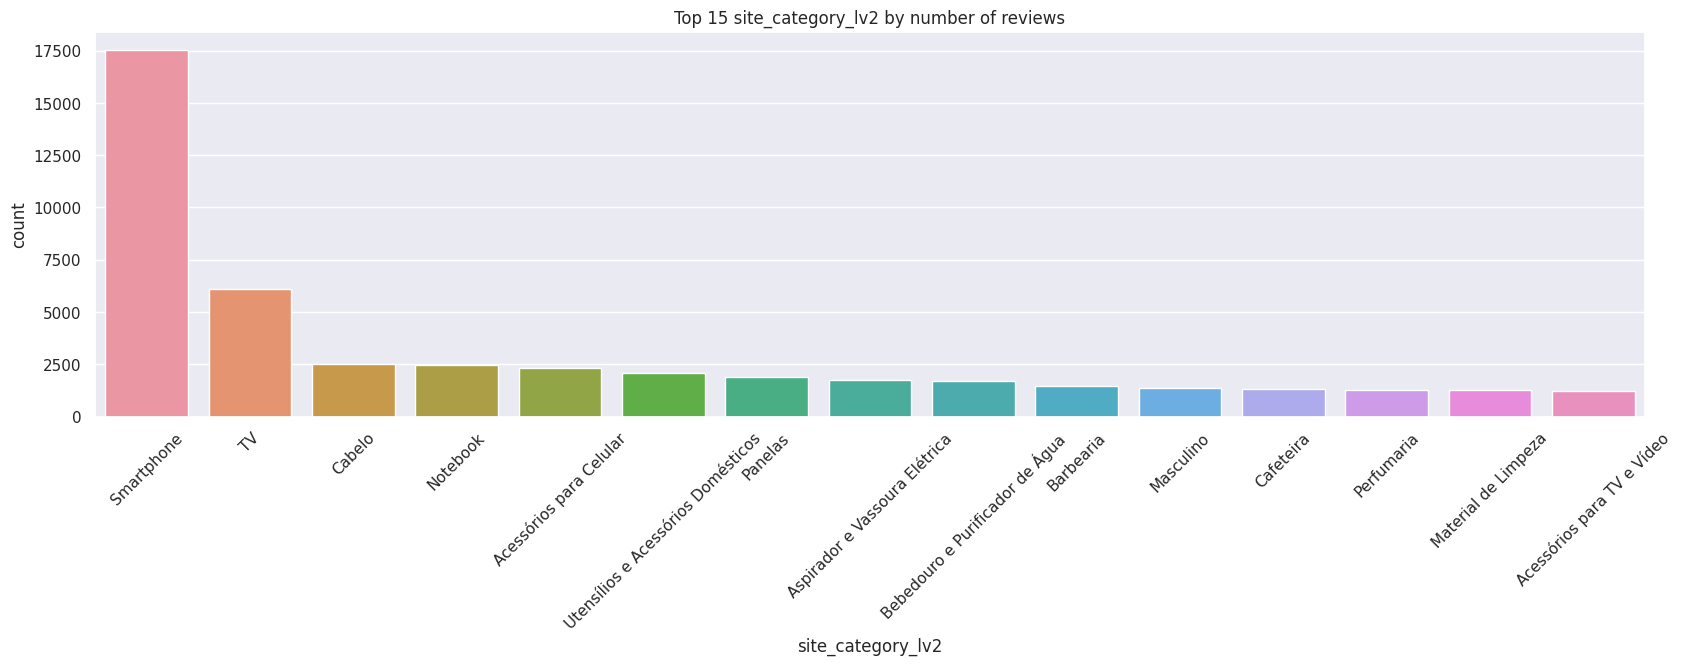

In [49]:
plot_ranking(df_features, 'site_category_lv2', 'Top 15 site_category_lv2 by number of reviews', figsize=(20, 5))

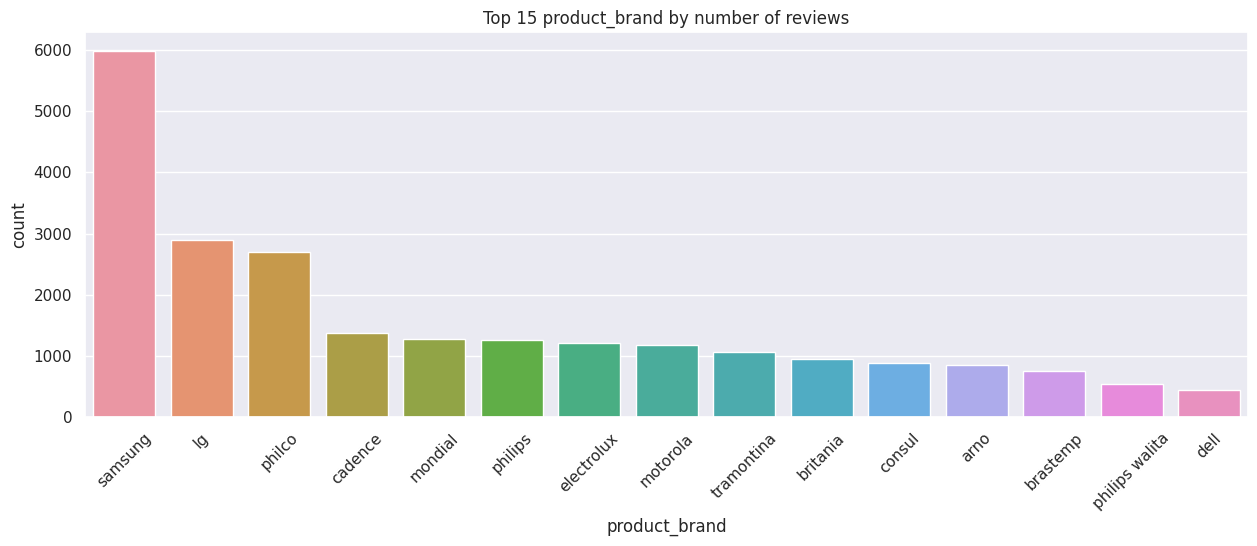

In [50]:
plot_ranking(df_features, 'product_brand', 'Top 15 product_brand by number of reviews', number_of_values=15)

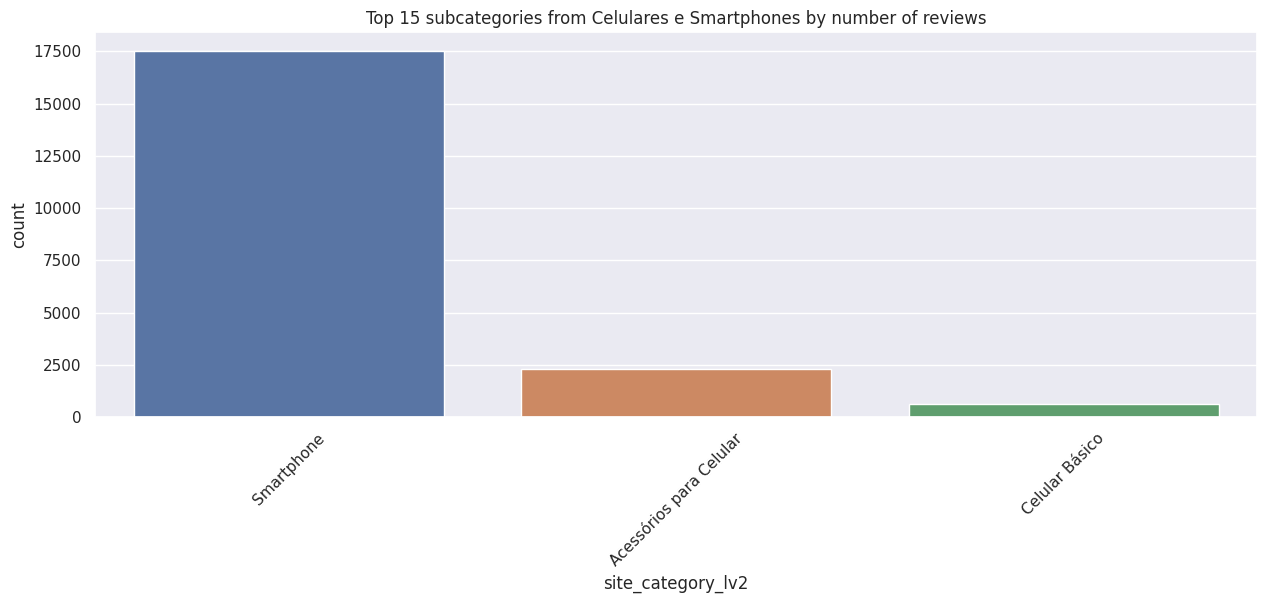

In [81]:
# Print top subcategories inside "celulares-e-smartphones"
data_cels_n_smarts = df_features[df_features['site_category_lv1'] == 'Celulares e Smartphones']
plot_ranking(data_cels_n_smarts, 'site_category_lv2', 'Top 15 subcategories from Celulares e Smartphones by number of reviews', number_of_values=3)

**Share of Smartphone reviews from the website**

In [52]:
smartphone_reviews = df_features['site_category_lv2'].value_counts().loc['Smartphone']
total_reviews = len(df_features)

print(f'Smartphone reviews represent {smartphone_reviews/total_reviews*100:.2f}% of the total reviews from the website') 

Smartphone reviews represent 13.34% of the total reviews from the website


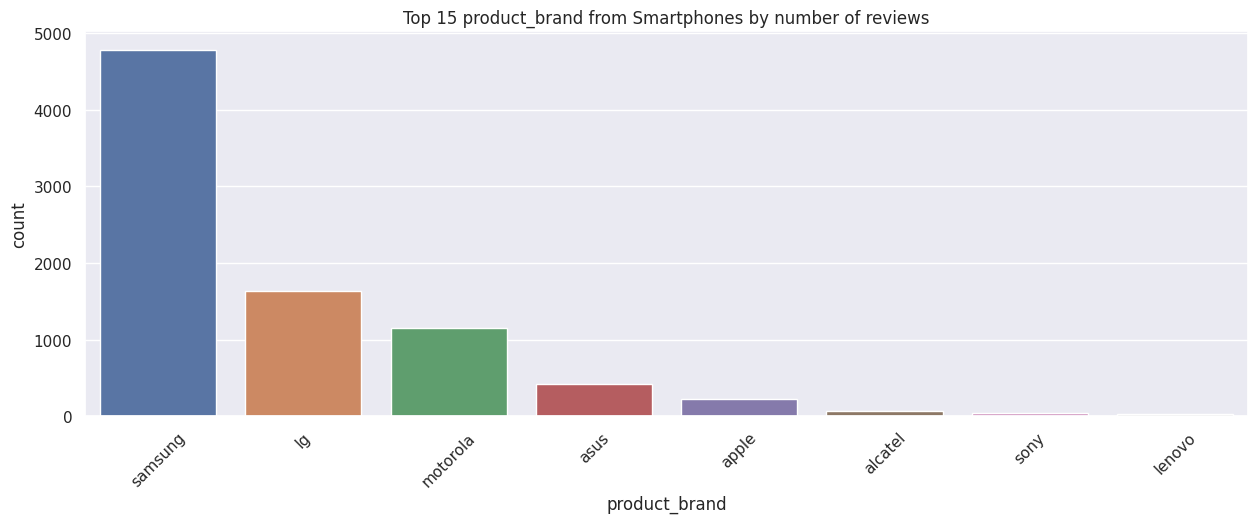

In [53]:
# Print top subcategories inside "celulares-e-smartphones"
data_cels_n_smarts = df_features[df_features['site_category_lv2'] == 'Smartphone']
plot_ranking(data_cels_n_smarts, 'product_brand', 'Top 15 product_brand from Smartphones by number of reviews', number_of_values=8)

**However, the distribution of sentiment is not linear in the categories. Visually, "Móveis" has almost 50% of approval while livros has 90%**

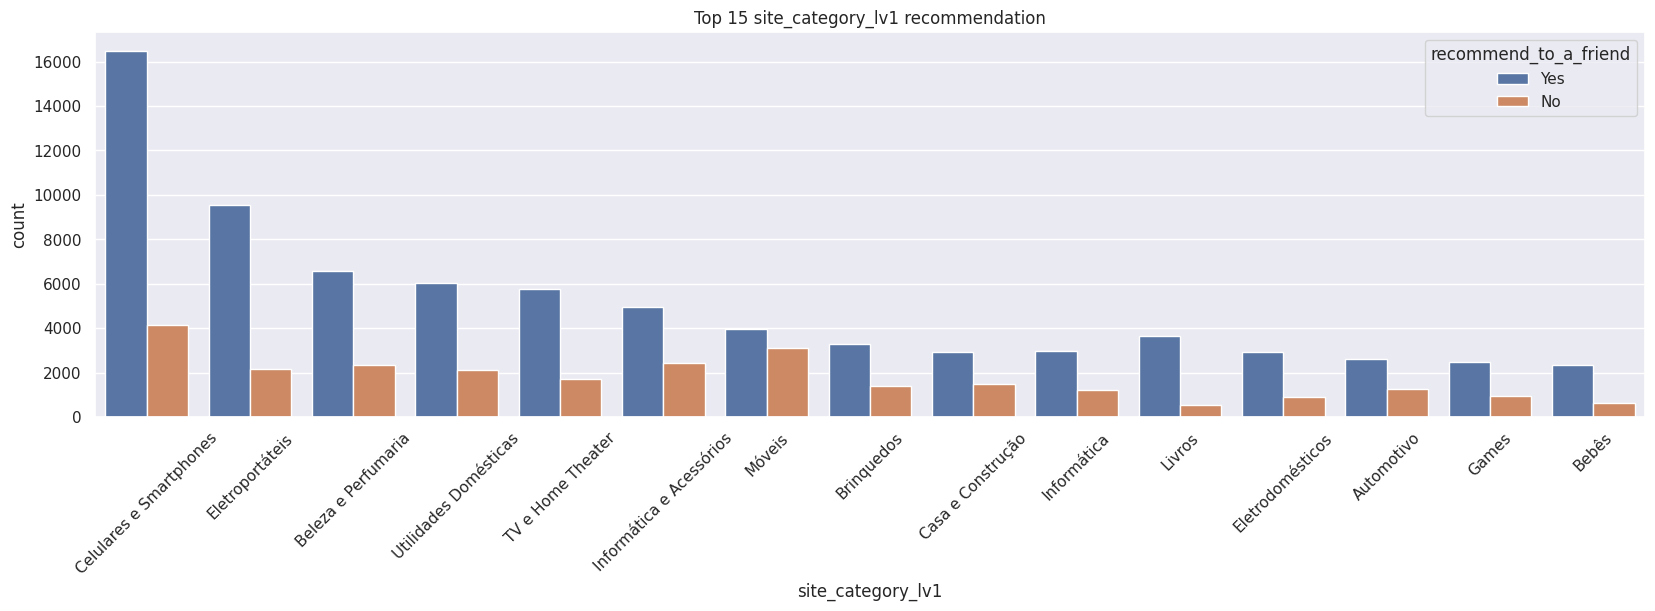

In [54]:
# Print top categories
fig, ax = plt.subplots(figsize=(20, 5))
 
# drawing the plot
sns.countplot(x='site_category_lv1', 
              data=df_features, 
              hue='recommend_to_a_friend', 
              order=df_features.site_category_lv1.value_counts().iloc[:15].index, 
              ax=ax).set(title='Top 15 site_category_lv1 recommendation')
plt.xticks(rotation=45)
plt.show()

Obtaining the sentiment for each category

In [55]:
# Obtain the sentiment for each category based on the positive reviews / total reviews
no_site_category_lv1 = df_features.loc[df_features['recommend_to_a_friend'] == 'No', 'site_category_lv1'].value_counts().to_frame()
yes_site_category_lv1 = df_features.loc[df_features['recommend_to_a_friend'] == 'Yes', 'site_category_lv1'].value_counts().to_frame()
df_site_category_lv1_recom = pd.merge(no_site_category_lv1, yes_site_category_lv1, left_index=True, right_index=True, suffixes=('_no', '_yes'))
df_site_category_lv1_recom['sentiment'] = df_site_category_lv1_recom['site_category_lv1_yes'] / (df_site_category_lv1_recom['site_category_lv1_yes'] + df_site_category_lv1_recom['site_category_lv1_no'])
df_site_category_lv1_recom.sort_values(by='sentiment', ascending=False, inplace=True)
df_site_category_lv1_recom['total'] = df_site_category_lv1_recom['site_category_lv1_yes'] + df_site_category_lv1_recom['site_category_lv1_no']
df_site_category_lv1_recom.head()

,site_category_lv1_no,site_category_lv1_yes,sentiment,total
Filmes e Séries,59,535,0.900673,594
Livros,533,3649,0.872549,4182
Livros Importados,11,70,0.864198,81
Música,39,217,0.847656,256
Artigos de Festa,1,5,0.833333,6


In [56]:
df_site_category_lv1_recom.sentiment.describe() 

count    50.000000
mean      0.696293
std       0.103159
min       0.482456
25%       0.655657
50%       0.711630
75%       0.747137
max       0.900673
Name: sentiment, dtype: float64

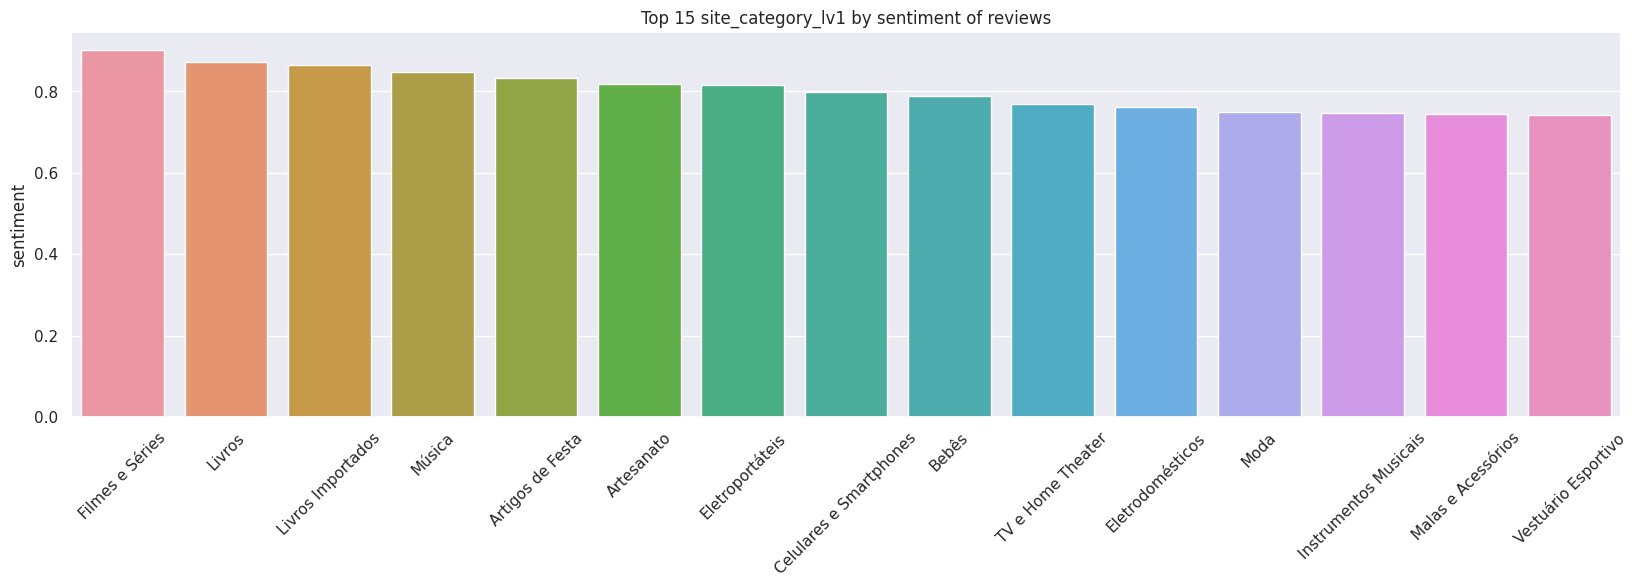

In [57]:
# Print top categories 
fig, ax = plt.subplots(figsize=(20, 5))
 
# drawing the plot
sns.barplot(data=df_site_category_lv1_recom,
            x=df_site_category_lv1_recom.index,
            y="sentiment",
            order=df_site_category_lv1_recom.sentiment.iloc[:15].index, 
            ax=ax).set(title='Top 15 site_category_lv1 by sentiment of reviews')
plt.xticks(rotation=45)
plt.show()

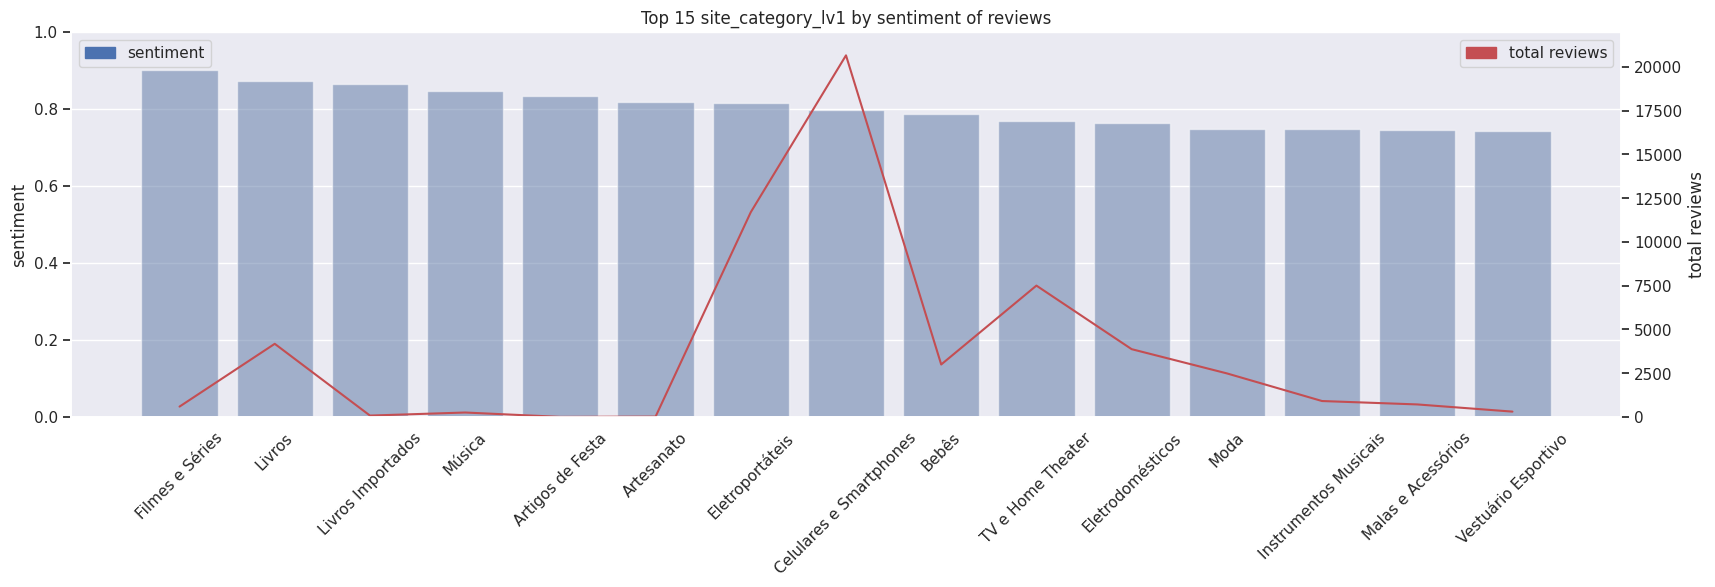

In [79]:
df_top_sentiment = df_site_category_lv1_recom[df_site_category_lv1_recom.index.isin(df_site_category_lv1_recom.sentiment.iloc[:15].index)]

def plot_sentiment(df, title):
    fig, ax1 = plt.subplots(figsize=(20, 5))
    # plot line graph on axis #1
    ax1 = sns.barplot(
        x=df.index, 
        y='sentiment', 
        data=df,  
        color='b',
        alpha=0.5
    )
    ax1.set_ylabel('sentiment')
    ax1.set_ylim(0, 1)
    ax1_patch = mpatches.Patch(color='b', label='sentiment')
    ax1.legend(handles=[ax1_patch], loc="upper left")
    # set up the 2nd axis
    ax1.tick_params('x', labelrotation=45)
    ax2 = ax1.twinx()
    # plot bar chart on axis #2
    sns.lineplot(
        x=df.index, 
        y='total', 
        data=df, 
        color='r',
    )
    ax2.set_ylabel('total reviews')
    ax2.set_ylim(0, 22000)
    ax2.grid(False)
    ax2_patch = mpatches.Patch(color='r', label='total reviews')
    ax2.legend(handles=[ax2_patch], loc="upper right")
    plt.title(title)
    plt.show()

plot_sentiment(df_top_sentiment, 'Top 15 site_category_lv1 by sentiment of reviews')

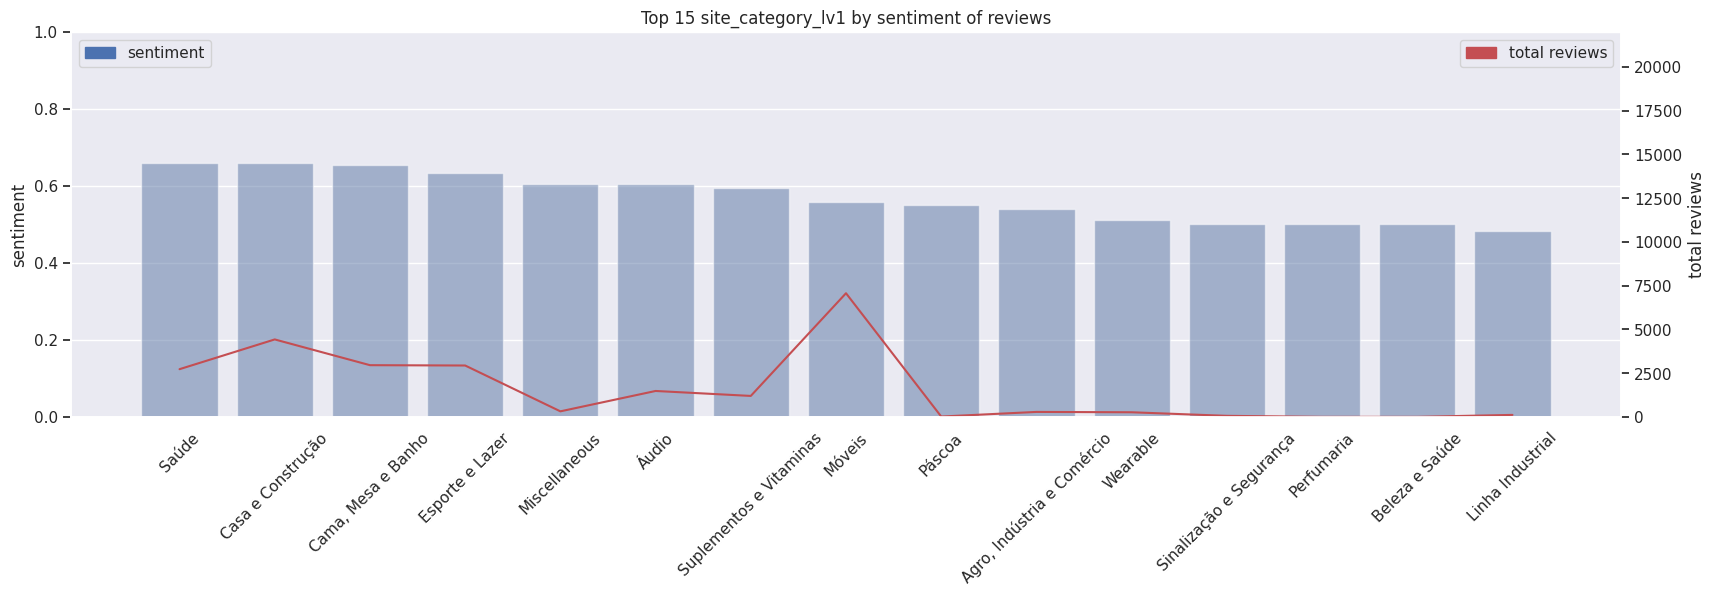

In [80]:
df_worst_sentiment = df_site_category_lv1_recom[df_site_category_lv1_recom.index.isin(df_site_category_lv1_recom.sentiment.iloc[-15:].index)]
plot_sentiment(df_worst_sentiment, 'Top 15 site_category_lv1 by sentiment of reviews')

## Target (Y) variable analysis 

### Check proportion of the target class

**Imbalanced dataset, where "Recommended" values are more dominating then "Not Recommended".**

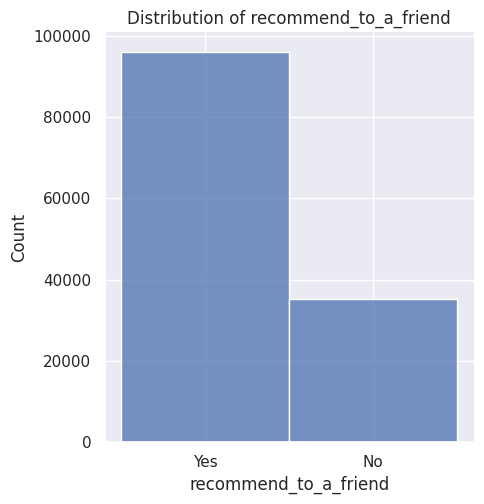

In [82]:
sns.displot(data=df_features, x="recommend_to_a_friend", discrete=True).set(title='Distribution of recommend_to_a_friend')

Check for skewedness of data, imbalaced labels, correlation with the calculated features and any other problem it might arrise.


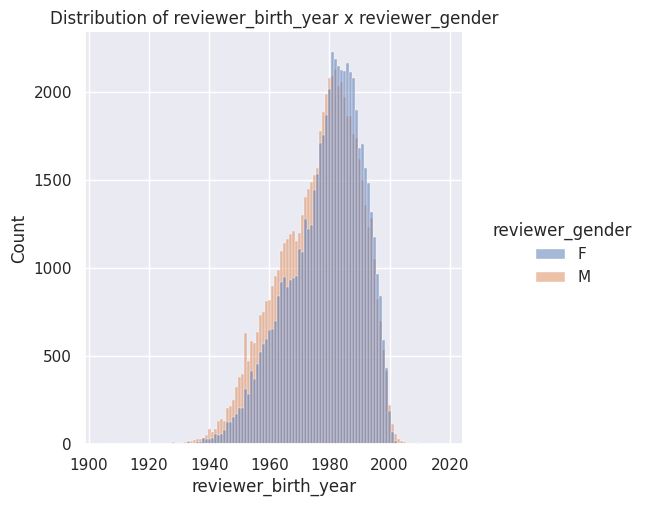

In [83]:
sns.displot(data=df_features, 
            x="reviewer_birth_year", 
            hue='reviewer_gender', 
            discrete=True).set(title='Distribution of reviewer_birth_year x reviewer_gender')

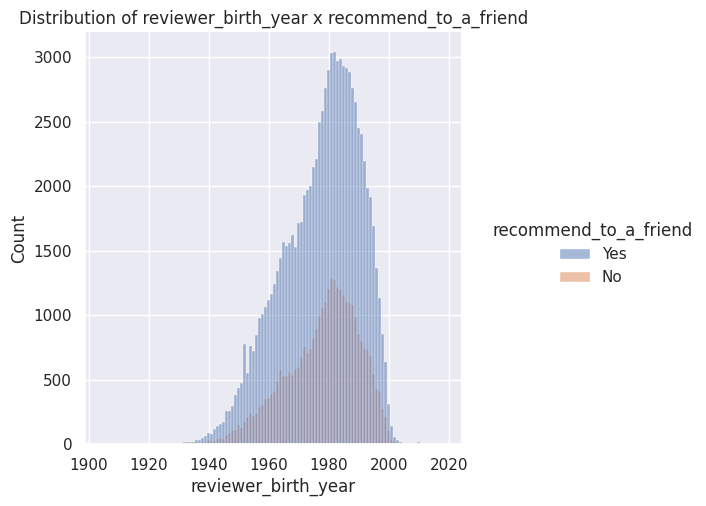

In [84]:
sns.displot(data=df_features, 
            x="reviewer_birth_year", 
            hue='recommend_to_a_friend', 
            discrete=True).set(title='Distribution of reviewer_birth_year x recommend_to_a_friend')

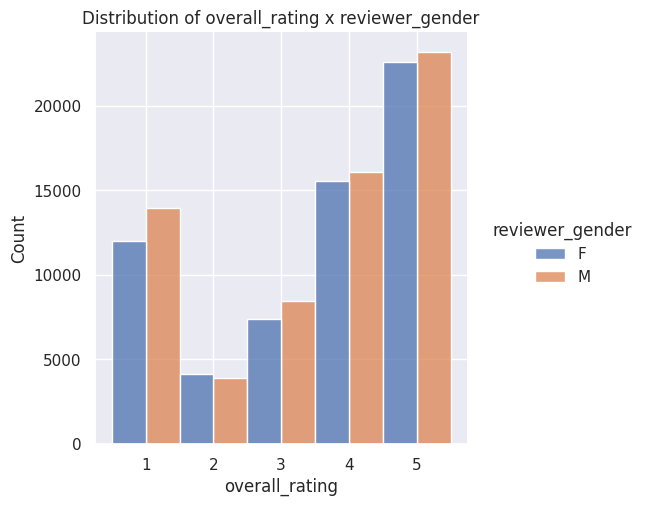

In [87]:
sns.displot(data=df_features, 
            x="overall_rating", 
            hue='reviewer_gender', 
            multiple="dodge", 
            discrete=True).set(title='Distribution of overall_rating x reviewer_gender')

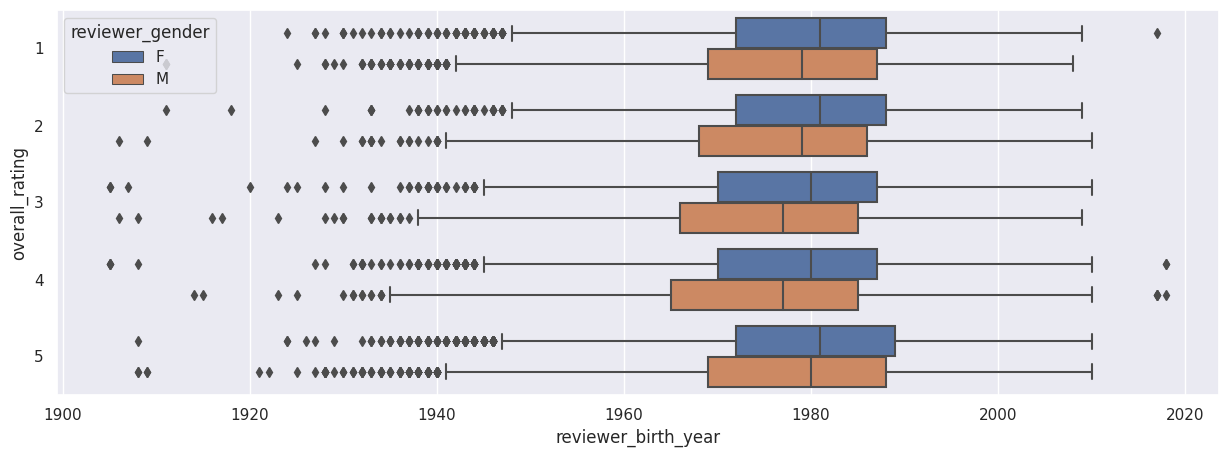

In [91]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="reviewer_birth_year", y="overall_rating",
            hue="reviewer_gender", orient="h",
            data=df_features)

plt.show()

**Insights:**
- Age and sex do not contibute greatly to the overall_rating and recommend_to_a_friend in a general way
- Despite the close number of men and women reviewing, in the average men are older than women
- Younger people tend to have more extreme opinions

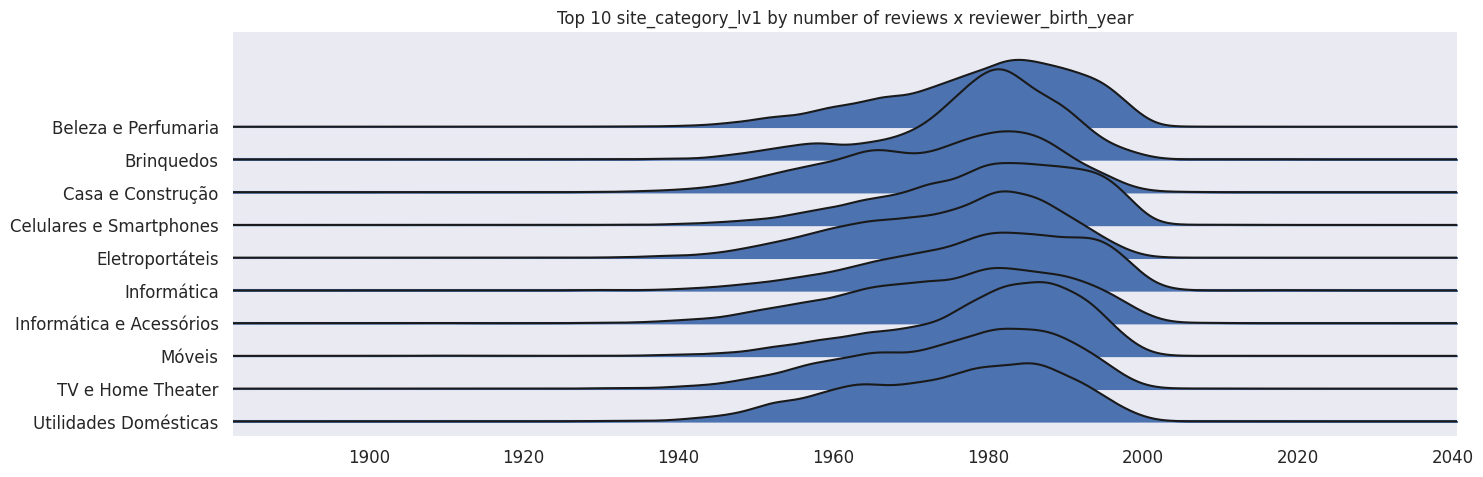

In [119]:
df_top_reviews = df_features[df_features.site_category_lv1.isin(df_features.site_category_lv1.value_counts().iloc[:10].index)]
fig, axes = joypy.joyplot(df_top_reviews, 
                          column="reviewer_birth_year", 
                          by="site_category_lv1",
                          overlap=1, 
                          figsize=(15, 5), 
                          title='Top 10 site_category_lv1 by number of reviews x reviewer_birth_year')

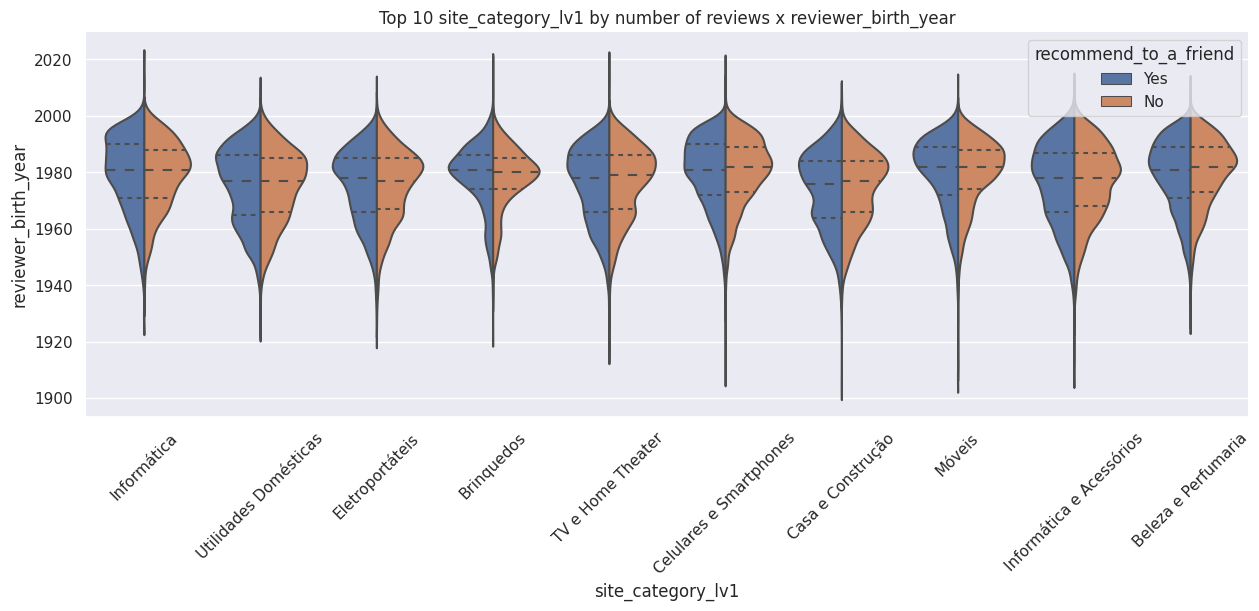

In [123]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x="site_category_lv1", y="reviewer_birth_year",  hue="recommend_to_a_friend",
               split=True, inner="quart",
               data=df_top_reviews).set(title='Top 10 most reviewed site_category_lv1 by number of reviews x reviewer_birth_year')
sns.despine(left=True)
plt.xticks(rotation=45)
plt.show()
